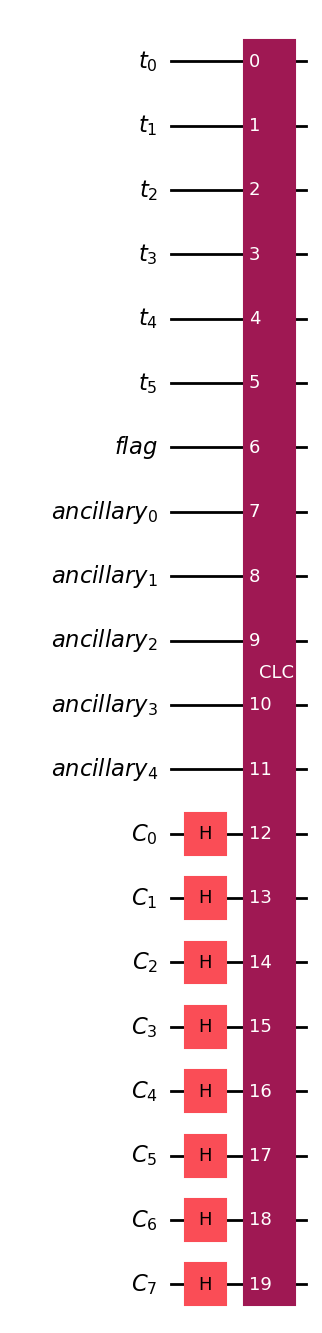

Output from CLC Test||
cycle|precision|cth_flag
00000000|001000| 1
00000001|001010| 1
00000010|001001| 1
00000011|001100| 1
00000100|000100| 1
00000101|000110| 1
00000110|000101| 1
00000111|001000| 1
00001000|000110| 1
00001001|001000| 1
00001010|000111| 1
00001011|001010| 1
00001100|000101| 1
00001101|000111| 1
00001110|000110| 1
00001111|001001| 1
00010000|001010| 1
00010001|001100| 1
00010010|001011| 1
00010011|001110| 0
00010100|000110| 1
00010101|001000| 1
00010110|000111| 1
00010111|001010| 1
00011000|001000| 1
00011001|001010| 1
00011010|001001| 1
00011011|001100| 1
00011100|000111| 1
00011101|001001| 1
00011110|001000| 1
00011111|001011| 1
00100000|000110| 1
00100001|001000| 1
00100010|000111| 1
00100011|001010| 1
00100100|000010| 1
00100101|000100| 1
00100110|000011| 1
00100111|000110| 1
00101000|000100| 1
00101001|000110| 1
00101010|000101| 1
00101011|001000| 1
00101100|000011| 1
00101101|000101| 1
00101110|000100| 1
00101111|000111| 1
00110000|001000| 1
00110001|001010| 1
00

In [1]:
import warnings
warnings.filterwarnings("ignore")


from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit, QuantumRegister, transpile
from qiskit_aer import Aer
from clc import create_clc_oracle
import numpy as np
from numpy import pi


# --- Parameters ---
t = 6  # number of precision qubits
threshold = 13  # threshold in phase units (0–63 since t=6)

theta_matrix = np.array([
    [0, pi/16, pi/32, pi/8],  # distances from city 0
    [pi/8, 0, pi/16, pi/32],  # distances from city 1
    [pi/16, pi/8, 0, pi/16],  # distances from city 2
    [pi/16, pi/32, pi/8, 0]   # distances from city 3
])


# --- Quantum Registers ---
precision = QuantumRegister(t, 't')        # Phase estimation qubits
flag = QuantumRegister(1, 'flag')          # Marking solutions which are under the threshold
ancillary = QuantumRegister(5, 'ancillary')
cycle = QuantumRegister(8, 'C')            # Cycle qubits

qc = QuantumCircuit(precision, flag, ancillary, cycle)
qc.h(cycle)  # superposition over tours

clc = create_clc_oracle(theta_matrix, t, threshold)
qc.append(clc,[*precision, *flag, *ancillary, *cycle])

display(qc.draw("mpl"))

# Simulate the statevector
backend = Aer.get_backend('statevector_simulator')
compiled = transpile(qc, backend)
result = backend.run(compiled).result()
state = result.get_statevector()


print("Output from CLC Test||")
print("cycle|precision|cth_flag")
for i,amp in enumerate(state):
    if abs(amp) > 1e-6:
        bin_str = format(i, f'0{20}b')
        t_bits   = bin_str[14:20][::-1]
        flag_bit = bin_str[13]
        ancillary_flag_bits = bin_str[8:13]
        cycle_bits = bin_str[0:8]
        print(f"{cycle_bits}|{t_bits}| {flag_bit}")
